In [1]:
import sys

In [2]:
sys.path.append('..')

In [3]:
from nbhd import data

Initializing database connection...
Database connected!


In [4]:
db = data.Base()

In [5]:
db.ls()

['spatial_ref_sys',
 'slimroads',
 'opennames',
 'openroads',
 'openmaplocal',
 'openuprn',
 'railways',
 'rivers',
 'coastline',
 'roadnodes',
 'bigtilesa']

In [6]:
coast = db.select('coastline')

<AxesSubplot:>

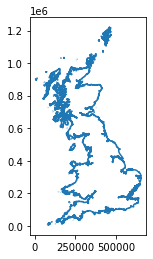

In [7]:
coast.plot()

In [73]:
import geopandas as gpd

In [45]:
from shapely.geometry import MultiPolygon, MultiLineString, Polygon

In [67]:
from shapely.ops import polygonize

In [11]:
britain = MultiLineString(list(coast.geometry.values))

In [70]:
b = MultiPolygon(polygonize(britain))

In [74]:
gs = gpd.GeoSeries(list(b.geoms))

In [82]:
gs.area.sort_values()

72      2.000000e+02
40      2.500000e+02
41      2.900000e+02
36      3.000000e+02
37      4.500000e+02
            ...     
694     8.816433e+08
2030    9.781752e+08
2369    1.632400e+09
2375    2.145244e+09
317     2.182420e+11
Length: 2399, dtype: float64

In [13]:
britain

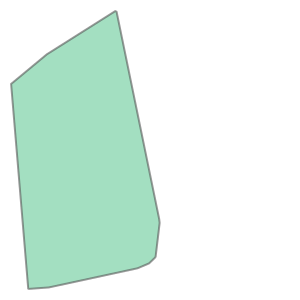

In [42]:
britain.convex_hull

In [46]:
x0, y0, x1, y1 = britain.convex_hull.bounds

bounds = Polygon([(x0,y0), (x0,y1), (x1,y1), (x1,y0), (x0,y0)])

In [51]:
x0, y0, x1, y1

(5720.0, 5180.0, 655503.0, 1220373.0)

In [53]:
(x1-x0)/2000

324.8915

In [54]:
(y1-y0)/2000

607.5965

In [59]:
b = MultiPolygon(list(britain.geometry))

AttributeError: 'MultiLineString' object has no attribute 'geometry'

In [84]:
mainland_britain = gs.iloc[317]

In [86]:
x0,y0,x1,y1 = mainland_britain.bounds

In [87]:
bbox = Polygon([(x0,y0),(x0,y1),(x1,y1),(x1,y0),(x0,y0)])

In [97]:
(x1 - x0)/10000

52.0912

In [98]:
(y1-y0)/10000

96.5112

In [100]:
53*97

5141

In [96]:
261*483 / 3600

35.0175

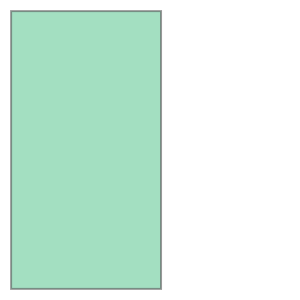

In [24]:
from nbhd.geography import Neighbourhood

In [26]:
n = Neighbourhood(load=False)

In [31]:
n.geom.bounds

(336097.29, 390882.94, 339909.39, 393101.26)

In [37]:
count_buildings = db.query('SELECT COUNT("id") AS uprn_count FROM openmaplocal')

In [36]:
count.values[0][0]

39706745

In [38]:
count_buildings

,uprn_count
0,14508888


In [40]:
db.query('SELECT COUNT(name1) FROM openroads')

,count
0,2473875
